In [2]:
import numpy as np
import netCDF4 as nc
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import xarray as xr
import matplotlib.gridspec as gridspec
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [7]:
hist_hail = xr.open_mfdataset('/home/scratch/ahaberlie/AFWA_HAIL/HIST/2000-2001/HAIL_MAX2D_historical_*.nc')

In [8]:
hist_hail

<xarray.Dataset>
Dimensions:     (Time: 8719, south_north: 899, west_east: 1399)
Coordinates:
  * Time        (Time) datetime64[ns] 2000-10-01 ... 2001-09-29T06:00:00
Dimensions without coordinates: south_north, west_east
Data variables:
    HAIL_MAX2D  (Time, south_north, west_east) float32 dask.array<chunksize=(24, 899, 1399), meta=np.ndarray>
Attributes: (12/93)
    TITLE:                            OUTPUT FROM WRF V4.1.2 MODEL
    START_DATE:                      2000-10-01_00:00:00
    WEST-EAST_GRID_DIMENSION:        1400
    SOUTH-NORTH_GRID_DIMENSION:      900
    BOTTOM-TOP_GRID_DIMENSION:       51
    DX:                              3750.0
    ...                              ...
    file_count:                      24
    first_file:                      /gpfs/csfs1/univ/unid0001/historical/200...
    last_file:                       /gpfs/csfs1/univ/unid0001/historical/200...
    first_time:                      2000-10-01T00:00:00.000000000
    last_time:                       2000-10-01T23:00:00.000000000
    sim:                             historical

In [4]:
coords = xr.open_dataset('lat_lon.nc')

In [26]:
lats = ds.CLAT.values
lons = ds.CLONG.values

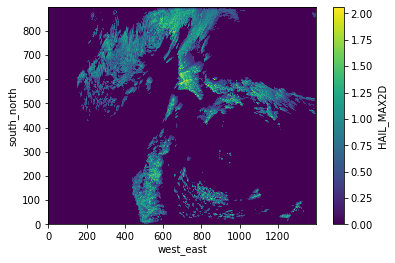

In [9]:
hail = hist_hail.HAIL_MAX2D * 39.3701 #Convert to in
#hail_resample = hail.groupby('time.day').max('time')
hail.sel(Time = '2001-06-01').max(dim = 'Time').plot()
#hail_over_inch = np.where(hail >= 1)